In [71]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
paths = ["prices_round_4_day_1.csv", "prices_round_4_day_2.csv", "prices_round_4_day_3.csv"]

df = pd.DataFrame()
for i, path in enumerate(paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    df = pd.concat([df, new_df])

df.tail(20)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
19980,3,2999000,COCONUT_COUPON,579.0,38.0,NaN,NaN,NaN,NaN,580,38,NaN,NaN,NaN,NaN,579.5,0.0
19981,3,2999000,COCONUT,9886.0,122.0,9885.0,46.0,NaN,NaN,9887,122,9888.0,46.0,NaN,NaN,9886.5,0.0
19982,3,2999100,COCONUT_COUPON,578.0,32.0,NaN,NaN,NaN,NaN,579,32,NaN,NaN,NaN,NaN,578.5,0.0
19983,3,2999100,COCONUT,9883.0,170.0,NaN,NaN,NaN,NaN,9885,101,9886.0,69.0,NaN,NaN,9884.0,0.0
19984,3,2999200,COCONUT_COUPON,577.0,35.0,NaN,NaN,NaN,NaN,578,35,NaN,NaN,NaN,NaN,577.5,0.0
19985,3,2999200,COCONUT,9883.0,148.0,9882.0,65.0,NaN,NaN,9884,148,9885.0,65.0,NaN,NaN,9883.5,0.0
19986,3,2999300,COCONUT,9883.0,108.0,9882.0,74.0,NaN,NaN,9884,108,9885.0,74.0,NaN,NaN,9883.5,0.0
19987,3,2999300,COCONUT_COUPON,577.0,37.0,NaN,NaN,NaN,NaN,578,37,NaN,NaN,NaN,NaN,577.5,0.0
19988,3,2999400,COCONUT_COUPON,577.0,39.0,NaN,NaN,NaN,NaN,578,39,NaN,NaN,NaN,NaN,577.5,0.0
19989,3,2999400,COCONUT,9883.0,118.0,9882.0,69.0,NaN,NaN,9885,187,NaN,NaN,NaN,NaN,9884.0,0.0


In [73]:
size = 30000
COCONUT_MEAN = 9999.900983333333
COUPON_MEAN = 635.0464333333333

coconut = np.array(df[df["product"] == "COCONUT"]['mid_price'].to_list()[0:size])
coupon = np.array(df[df["product"] == "COCONUT_COUPON"]['mid_price'].to_list()[0:size])

times = [i for i in range(size)]

predicted_coupon = [(coco_price - COCONUT_MEAN) * 0.5 + COUPON_MEAN for coco_price in coconut]



ranges = [0.001 * i + 0.3 for i in range(1000)]
print(ranges)

best_rmse = 1e9
factor = -1
for i in ranges:
    predicted_coupon = [(coco_price - COCONUT_MEAN) * i + COUPON_MEAN for coco_price in coconut]

    rmse = np.sqrt(np.mean((predicted_coupon-coupon)**2))

    if rmse < best_rmse:
        best_rmse = rmse
        factor = i

print(best_rmse, factor)


[0.3, 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31, 0.311, 0.312, 0.313, 0.314, 0.315, 0.316, 0.317, 0.318, 0.319, 0.32, 0.321, 0.322, 0.323, 0.324, 0.325, 0.326, 0.327, 0.328, 0.329, 0.32999999999999996, 0.33099999999999996, 0.33199999999999996, 0.33299999999999996, 0.33399999999999996, 0.33499999999999996, 0.33599999999999997, 0.33699999999999997, 0.33799999999999997, 0.33899999999999997, 0.33999999999999997, 0.34099999999999997, 0.34199999999999997, 0.34299999999999997, 0.344, 0.345, 0.346, 0.347, 0.348, 0.349, 0.35, 0.351, 0.352, 0.353, 0.354, 0.355, 0.356, 0.357, 0.358, 0.359, 0.36, 0.361, 0.362, 0.363, 0.364, 0.365, 0.366, 0.367, 0.368, 0.369, 0.37, 0.371, 0.372, 0.373, 0.374, 0.375, 0.376, 0.377, 0.378, 0.379, 0.38, 0.381, 0.382, 0.383, 0.384, 0.385, 0.386, 0.387, 0.388, 0.389, 0.39, 0.391, 0.392, 0.393, 0.394, 0.395, 0.396, 0.397, 0.398, 0.399, 0.4, 0.401, 0.402, 0.403, 0.404, 0.40499999999999997, 0.40599999999999997, 0.407, 0.408, 0.409, 0.41, 0.411, 0.4

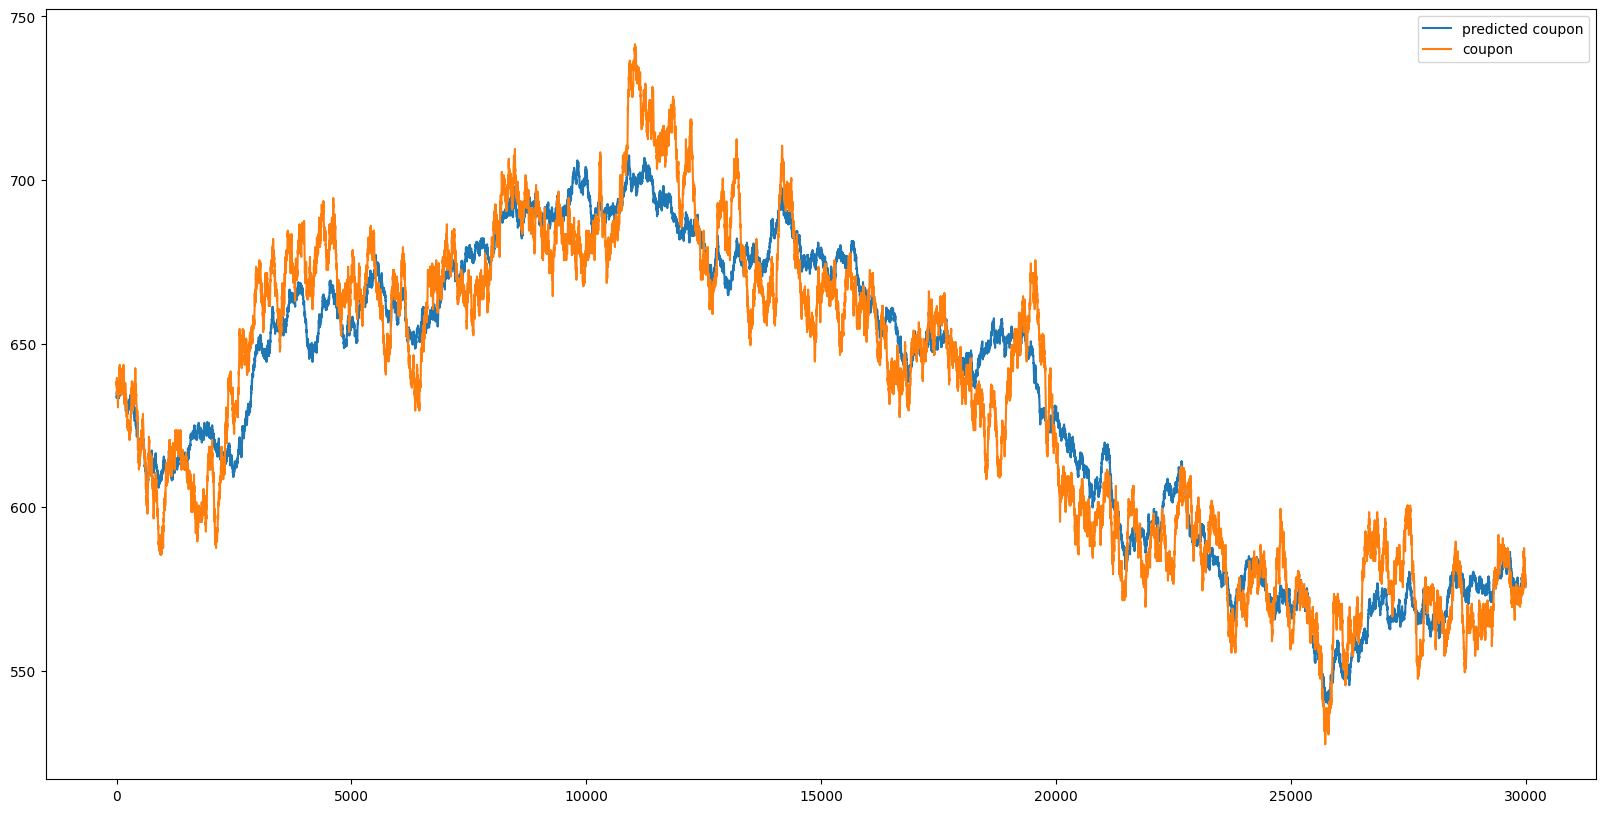

In [74]:
predicted_coupon = [(coco_price - COCONUT_MEAN) * factor + COUPON_MEAN for coco_price in coconut]
plt.figure(figsize=(20, 10))
plt.plot(times, predicted_coupon, label='predicted coupon')
plt.plot(times, coupon, label='coupon')
plt.legend()

In [84]:
print(sum(coupon))

19051393.0


1.5133991837501525e-13 13.381768062409492


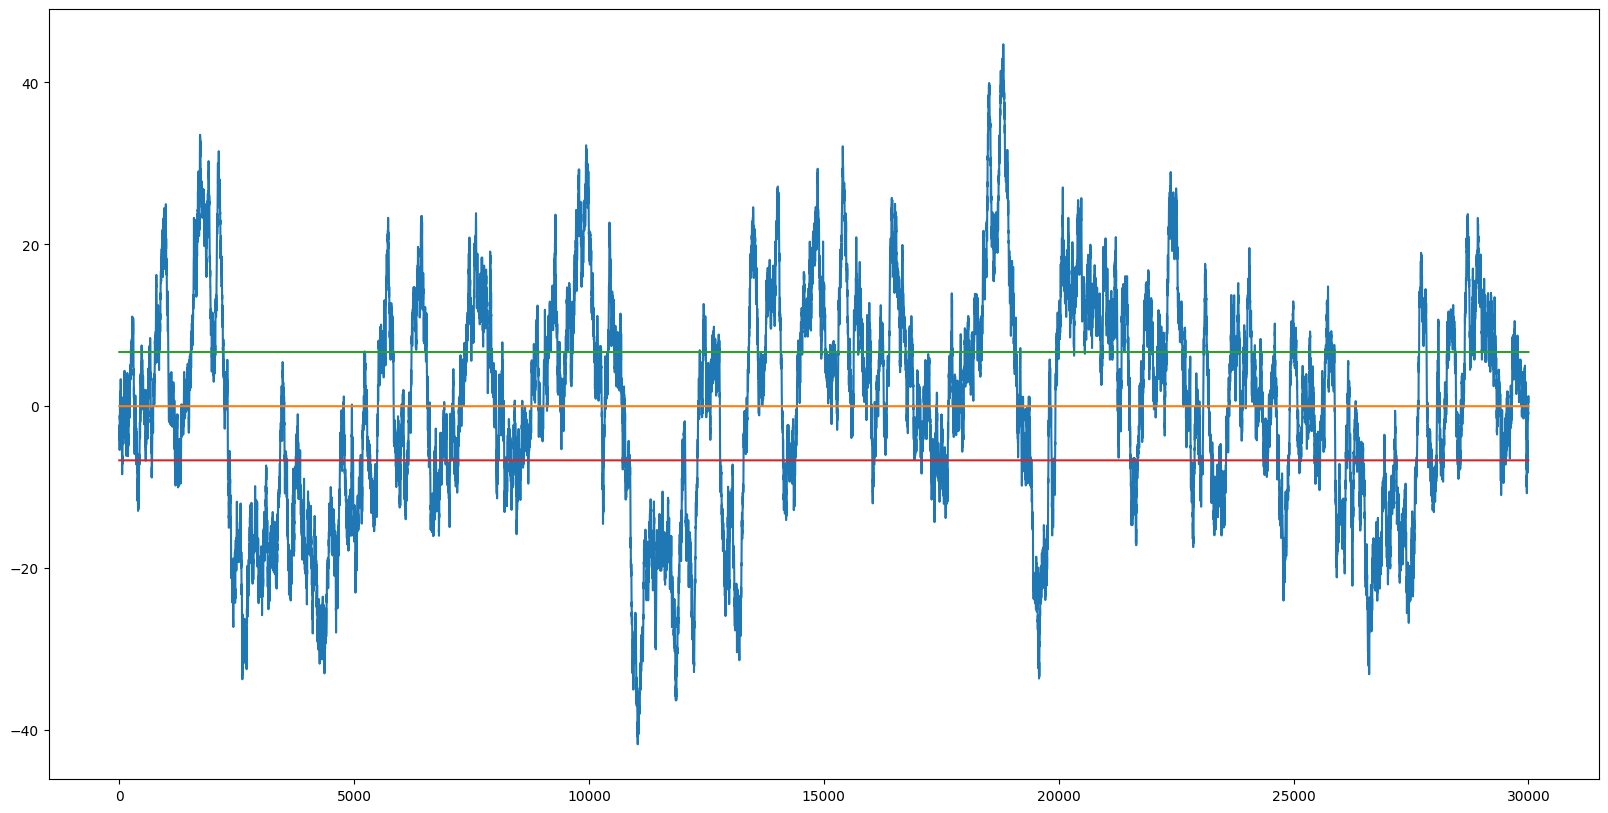

In [85]:
difference = [predicted_coupon[i] - coupon[i] for i in range(size)]
difference_mean = np.mean(difference)
difference_std = np.std(difference)

print(difference_mean, difference_std)

plt.figure(figsize=(20, 10))
plt.plot(times, difference)
plt.plot(times, [difference_mean for _ in range(size)])
plt.plot(times, [0.5*difference_std for _ in range(size)])
plt.plot(times, [-0.5*difference_std for _ in range(size)])

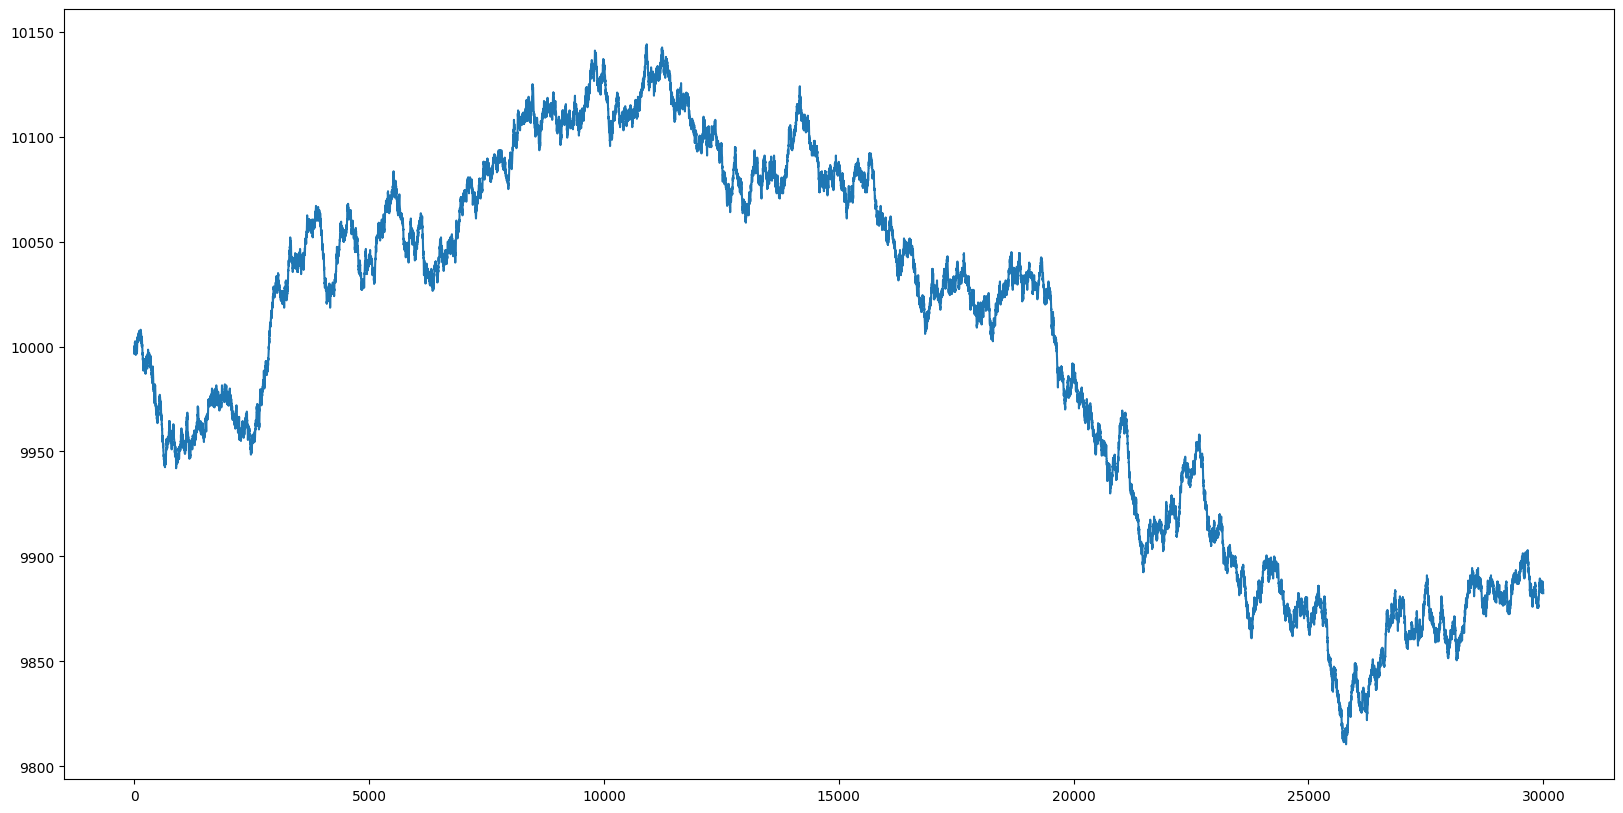

In [80]:
plt.figure(figsize=(20, 10))
plt.plot(times, coconut)